In [1]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import nibabel as nib

In [2]:
f = h5py.File('sample_A_20160501.hdf', 'r')

In [3]:
keys = [(k) for k in f.keys()]

In [4]:
keys

['__DATA_TYPES__', 'annotations', 'volumes']

In [5]:
[k for k in f[keys[0]].keys()]

['Enum_Boolean', 'String_VariableLength']

In [6]:
[k for k in f[keys[1]].keys()]

['comments', 'ids', 'locations', 'presynaptic_site', 'types']

In [7]:
[k for k in f[keys[2]]['labels'].keys()]

['clefts', 'neuron_ids']

In [8]:
dat = f['volumes/raw']
label = f['volumes/labels/neuron_ids']

In [9]:
dat.shape, label.shape

((125, 1250, 1250), (125, 1250, 1250))

In [151]:
arr = np.eye(4)*[10,1,1,1]

cube = dat
arr_im = nib.Nifti1Image(cube, arr)
file_string = 'cube.nii.gz'
nib.save(arr_im, file_string)

cube_mask = label
arr_im = nib.Nifti1Image(cube_mask, arr)
file_string = 'cube_mask.nii.gz'
nib.save(arr_im, file_string)

<Figure size 432x288 with 0 Axes>

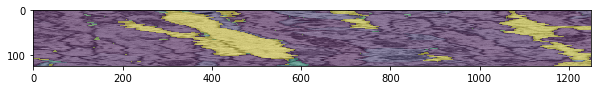

In [10]:
plt.figure()
plt.subplots(figsize=(10,10))
plt.imshow(dat[:,5,:], cmap='gray')
plt.imshow(label[:,5,:], alpha=.4)
plt.show()

In [11]:
import skimage.transform

In [12]:
new_img = dat[:,5,:]
new_lab = label[:,5,:]
new_img.shape


(125, 1250)

In [13]:
a = skimage.transform.resize(new_img, (1250,1250))
b = skimage.transform.resize(new_lab, (1250,1250))

/home/tony/anaconda3/envs/torch/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/tony/anaconda3/envs/torch/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
/home/tony/anaconda3/envs/torch/lib/python3.7/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from uint64 to float64
  .format(dtypeobj_in, dtypeobj_out))


<Figure size 432x288 with 0 Axes>

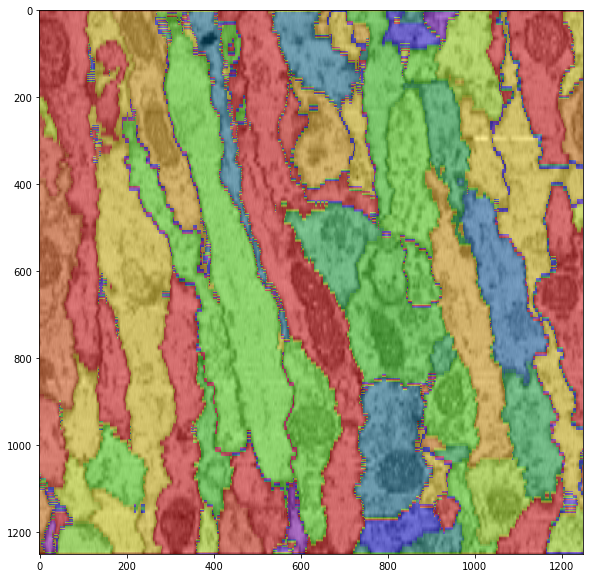

In [14]:
plt.figure()
plt.subplots(figsize=(10,10))
plt.imshow(a, cmap='gray')
plt.imshow(b, alpha=.4, cmap='prism')
plt.show()

<Figure size 432x288 with 0 Axes>

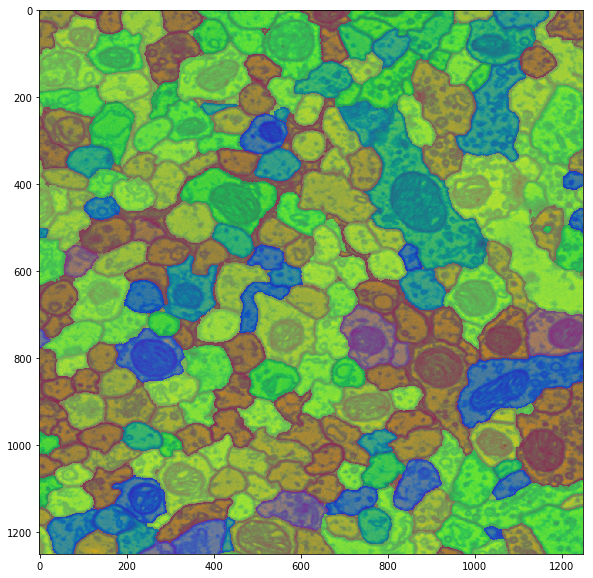

In [15]:
plt.figure()
plt.subplots(figsize=(10,10))
plt.imshow(dat[76,:,:])
plt.imshow(label[76,:,:], alpha=.4, cmap='prism')
plt.show()

<Figure size 432x288 with 0 Axes>

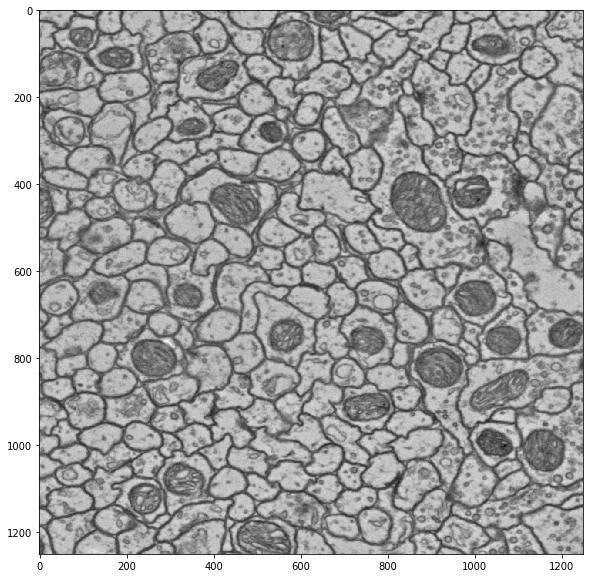

In [17]:
plt.figure()
plt.subplots(figsize=(10,10))
plt.imshow(dat[76,:,:], cmap='gray')
# plt.imshow(label[76,:,:], alpha=.4, cmap='prism')
plt.show()